<a href="https://colab.research.google.com/github/bagascahyawiguna/DataAnalysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bagas Cahyawiguna
- **Email:** bagascahyawiguna@gmail.com
- **ID Dicoding:** bagas_cahyawiguna20

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Jam dan hari apa yang paling banyak dan paling sedikit penyewaan sepeda?
- Bagaimana pengaruh musim terhadap penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Bagaimana perbandingan penyewaan sepeda antara pengguna casual dan pengguna terdaftar (registered)?
- Bagaimana perbandingan penyewaan sepeda antara tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [3]:
hour_df = pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Menampilkan lima baris pertama dari hour_df
- Menampilkan lima baris pertama dari day_df

### Assessing Data

#### Menilai tabel `hour_df`

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value
- Tidak ada duplikasi data
- Tidak ada inaccurate value
- Terdapat kesalahan tipe data pada kolom dtday

#### Menilai tabel `hour_df`

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value
- Tidak ada duplikasi data
- Tidak ada inaccurate value
- Terdapat kesalahan tipe data pada kolom dtday

### Cleaning Data

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipedata dteday berhasil diubah dari tipe data object menjadi datetime

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tipedata dteday berhasil diubah dari tipe data object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore hour_dv dengan day_df

In [17]:
# Agregasi total penyewaan sepeda per bulan
monthly_rentals = day_df.groupby('mnth').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Performansi Penyewaan Sepeda per Bulan:\n", monthly_rentals)

Performansi Penyewaan Sepeda per Bulan:
          cnt                         
         sum         mean   max   min
mnth                                 
1     134933  2176.338710  4521   431
2     151352  2655.298246  5062  1005
3     228920  3692.258065  8362   605
4     269094  4484.900000  7460   795
5     331686  5349.774194  8294  2633
6     346342  5772.366667  8120  3767
7     344948  5563.677419  8173  3285
8     351194  5664.419355  7865  1115
9     345991  5766.516667  8714  1842
10    322352  5199.225806  8156    22
11    254831  4247.183333  6852  1495
12    211036  3403.806452  6606   441


**Insight:**
- Penyewaan sepeda tertinggi ada pada bulan ke 8 atau Agustus

In [18]:
# Agregasi total penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hr').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Performansi Penyewaan Sepeda per Jam:\n", hourly_rentals)

Performansi Penyewaan Sepeda per Jam:
        cnt                     
       sum        mean  max min
hr                             
0    39130   53.898072  283   2
1    24164   33.375691  168   1
2    16352   22.869930  132   1
3     8174   11.727403   79   1
4     4428    6.352941   28   1
5    14261   19.889819   66   1
6    55132   76.044138  213   1
7   154171  212.064649  596   1
8   261001  359.011004  839   5
9   159438  219.309491  426  14
10  126257  173.668501  539   8
11  151320  208.143054  663  10
12  184414  253.315934  776   3
13  184919  253.661180  760  11
14  175652  240.949246  750  12
15  183149  251.233196  750   7
16  227748  311.983562  783  11
17  336860  461.452055  976  15
18  309772  425.510989  977  23
19  226789  311.523352  743  11
20  164550  226.030220  567  11
21  125445  172.314560  584   6
22   95612  131.335165  502   9
23   63941   87.831044  256   2


**Insight:**
- Performansi penyewaan sepeda perjam tertinggi ada pada jam 17

In [19]:
# Agregasi total penyewaan sepeda per hari dalam seminggu
weekday_rentals = day_df.groupby('weekday').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Performansi Penyewaan Sepeda per Hari dalam Seminggu:\n", weekday_rentals)

Performansi Penyewaan Sepeda per Hari dalam Seminggu:
             cnt                         
            sum         mean   max   min
weekday                                 
0        444027  4228.828571  8227   605
1        455503  4338.123810  7525    22
2        469109  4510.663462  7767   683
3        473048  4548.538462  8173   441
4        485395  4667.259615  7804   431
5        487790  4690.288462  8362  1167
6        477807  4550.542857  8714   627


**Insight:**
- Performansi penyewaan sepeda per Hari tertinggi ada pada Hari Jumat

In [20]:
# Agregasi total penyewaan sepeda per musim
seasonal_rentals = day_df.groupby('season').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Pengaruh Musim terhadap Penyewaan Sepeda:\n", seasonal_rentals)

Pengaruh Musim terhadap Penyewaan Sepeda:
             cnt                         
            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22


**Insight:**
- Pada musim panas merupakan penyewaan sepeda tertinggi

In [21]:
# Agregasi total penyewaan sepeda berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Pengaruh Cuaca terhadap Penyewaan Sepeda:\n", weather_rentals)

Pengaruh Cuaca terhadap Penyewaan Sepeda:
                 cnt                        
                sum         mean   max  min
weathersit                                 
1           2257952  4876.786177  8714  431
2            996858  4035.862348  8362  605
3             37869  1803.285714  4639   22


**Insight:**
- Pada cuaca cerah merupakan tingkat penyewaan sepeda tertinggi, dan pada cuaca hujan lebat tidak ada penyewaan sepeda sama sekali

In [22]:
# Agregasi total penyewaan sepeda berdasarkan jenis pengguna
user_type_rentals = day_df.agg({
    'casual': ['sum', 'mean', 'max', 'min'],
    'registered': ['sum', 'mean', 'max', 'min']
})
print("Perbandingan Penyewaan Sepeda antara Pengguna Casual dan Terdaftar:\n", user_type_rentals)

Perbandingan Penyewaan Sepeda antara Pengguna Casual dan Terdaftar:
              casual    registered
sum   620017.000000  2.672662e+06
mean     848.176471  3.656172e+03
max     3410.000000  6.946000e+03
min        2.000000  2.000000e+01


**Insight:**
- Penyewa sepeda teregistrasi lebih banyak dibandingkan dengan penyewa sepeda casual (tidak teregistrasi)

In [23]:
# Agregasi total penyewaan sepeda per tahun
yearly_rentals = day_df.groupby('yr').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Perbandingan Penyewaan Sepeda antara Tahun 2011 dan 2012:\n", yearly_rentals)

Perbandingan Penyewaan Sepeda antara Tahun 2011 dan 2012:
         cnt                        
        sum         mean   max  min
yr                                 
0   1243103  3405.761644  6043  431
1   2049576  5599.934426  8714   22


**Insight:**
- Jumlah penyewaan sepeda lebih tinggin di tahun 2012 dibanding tahun 2011

## Visualization & Explanatory Analysis

### Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?

In [24]:
# Agregasi total penyewaan sepeda per bulan
monthly_rentals = day_df.groupby('mnth').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Performansi Penyewaan Sepeda per Bulan:\n", monthly_rentals)

Performansi Penyewaan Sepeda per Bulan:
          cnt                         
         sum         mean   max   min
mnth                                 
1     134933  2176.338710  4521   431
2     151352  2655.298246  5062  1005
3     228920  3692.258065  8362   605
4     269094  4484.900000  7460   795
5     331686  5349.774194  8294  2633
6     346342  5772.366667  8120  3767
7     344948  5563.677419  8173  3285
8     351194  5664.419355  7865  1115
9     345991  5766.516667  8714  1842
10    322352  5199.225806  8156    22
11    254831  4247.183333  6852  1495
12    211036  3403.806452  6606   441


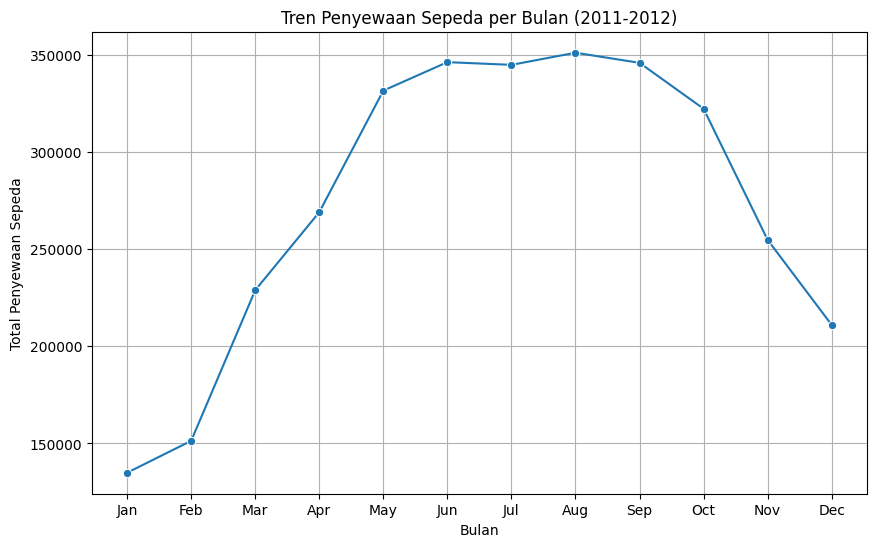

In [25]:
# Agregasi data per bulan
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()

# Plot tren penyewaan sepeda per bulan
plt.figure(figsize=(10, 6))
sn.lineplot(x=monthly_rentals.index, y=monthly_rentals.values, marker='o')
plt.title('Tren Penyewaan Sepeda per Bulan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Jam dan hari apa yang paling banyak dan paling sedikit penyewaan sepeda?

#### Penyewaan Sepeda per Jam

In [26]:
# Agregasi total penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hr').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Performansi Penyewaan Sepeda per Jam:\n", hourly_rentals)

Performansi Penyewaan Sepeda per Jam:
        cnt                     
       sum        mean  max min
hr                             
0    39130   53.898072  283   2
1    24164   33.375691  168   1
2    16352   22.869930  132   1
3     8174   11.727403   79   1
4     4428    6.352941   28   1
5    14261   19.889819   66   1
6    55132   76.044138  213   1
7   154171  212.064649  596   1
8   261001  359.011004  839   5
9   159438  219.309491  426  14
10  126257  173.668501  539   8
11  151320  208.143054  663  10
12  184414  253.315934  776   3
13  184919  253.661180  760  11
14  175652  240.949246  750  12
15  183149  251.233196  750   7
16  227748  311.983562  783  11
17  336860  461.452055  976  15
18  309772  425.510989  977  23
19  226789  311.523352  743  11
20  164550  226.030220  567  11
21  125445  172.314560  584   6
22   95612  131.335165  502   9
23   63941   87.831044  256   2


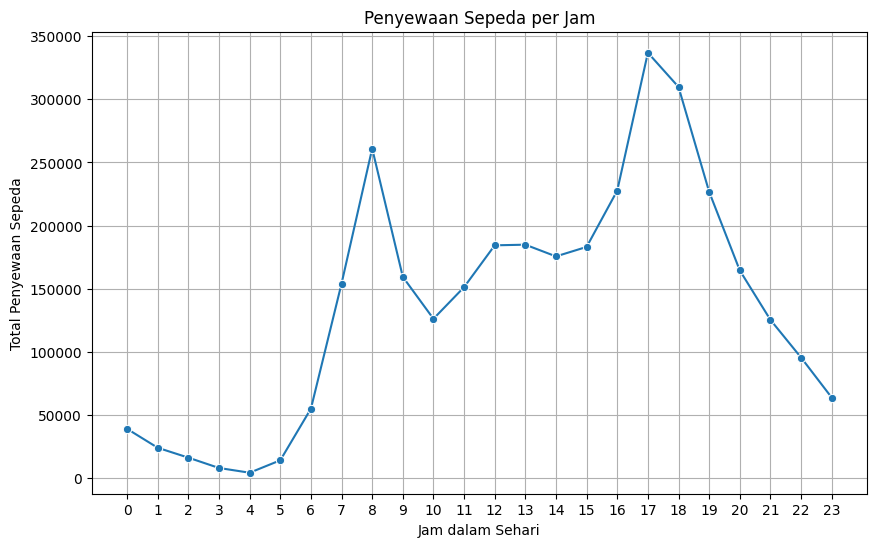

In [27]:
# Agregasi total penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()

# Plot penyewaan sepeda per jam
plt.figure(figsize=(10, 6))
sn.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')
plt.title('Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(ticks=range(0, 24))
plt.grid(True)
plt.show()

#### Penyewaan Sepeda per Hari dalam Seminggu

In [28]:
# Agregasi total penyewaan sepeda per hari dalam seminggu
weekday_rentals = day_df.groupby('weekday').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Performansi Penyewaan Sepeda per Hari dalam Seminggu:\n", weekday_rentals)

Performansi Penyewaan Sepeda per Hari dalam Seminggu:
             cnt                         
            sum         mean   max   min
weekday                                 
0        444027  4228.828571  8227   605
1        455503  4338.123810  7525    22
2        469109  4510.663462  7767   683
3        473048  4548.538462  8173   441
4        485395  4667.259615  7804   431
5        487790  4690.288462  8362  1167
6        477807  4550.542857  8714   627


<ipython-input-29-af3f39c2ecc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=weekday_rentals.index, y=weekday_rentals.values, palette='viridis')


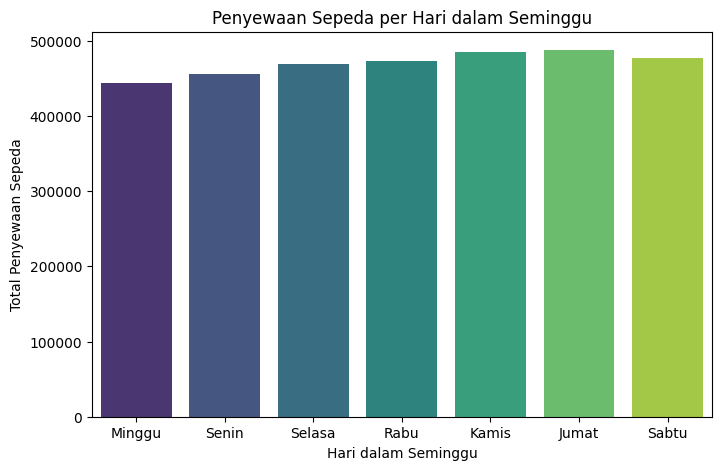

In [29]:
# Agregasi total penyewaan sepeda per hari dalam seminggu
weekday_rentals = day_df.groupby('weekday')['cnt'].sum()

# Plot penyewaan sepeda per hari dalam seminggu
plt.figure(figsize=(8, 5))
sn.barplot(x=weekday_rentals.index, y=weekday_rentals.values, palette='viridis')
plt.title('Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

### Bagaimana pengaruh musim terhadap penyewaan sepeda?

In [30]:
# Agregasi total penyewaan sepeda per musim
seasonal_rentals = day_df.groupby('season').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Pengaruh Musim terhadap Penyewaan Sepeda:\n", seasonal_rentals)

Pengaruh Musim terhadap Penyewaan Sepeda:
             cnt                         
            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22


<ipython-input-31-8b25ef1890bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, palette='viridis')


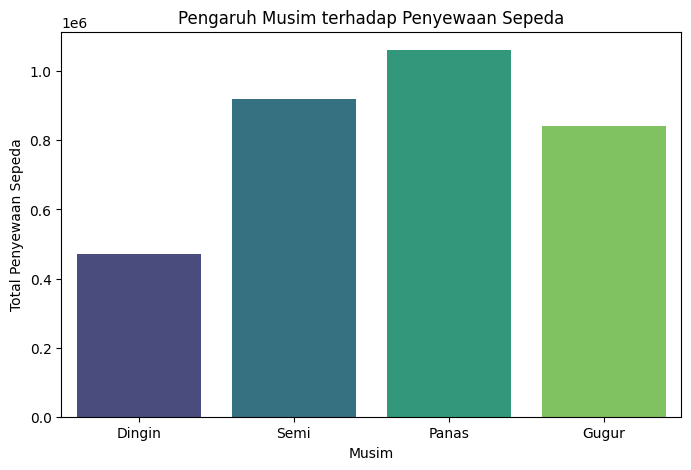

In [31]:
# Agregasi total penyewaan sepeda per musim
seasonal_rentals = day_df.groupby('season')['cnt'].sum()

# Plot pengaruh musim terhadap penyewaan sepeda
plt.figure(figsize=(8, 5))
sn.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, palette='viridis')
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Dingin', 'Semi', 'Panas', 'Gugur'])
plt.show()

### Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

In [32]:
# Agregasi total penyewaan sepeda berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Pengaruh Cuaca terhadap Penyewaan Sepeda:\n", weather_rentals)

Pengaruh Cuaca terhadap Penyewaan Sepeda:
                 cnt                        
                sum         mean   max  min
weathersit                                 
1           2257952  4876.786177  8714  431
2            996858  4035.862348  8362  605
3             37869  1803.285714  4639   22


<ipython-input-33-20509c64edd6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=weather_rentals.index, y=weather_rentals.values, palette='viridis')


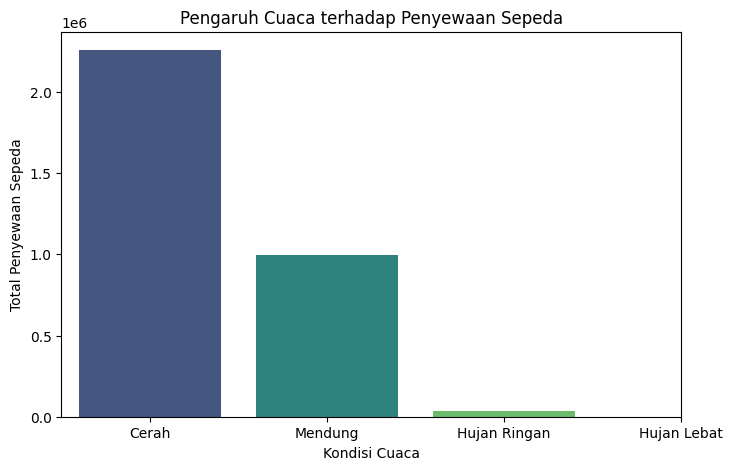

In [33]:
# Agregasi total penyewaan sepeda berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit')['cnt'].sum()

# Plot pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(8, 5))
sn.barplot(x=weather_rentals.index, y=weather_rentals.values, palette='viridis')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

### Bagaimana perbandingan penyewaan sepeda antara pengguna casual dan pengguna terdaftar (registered)?

In [34]:
# Agregasi total penyewaan sepeda berdasarkan jenis pengguna
user_type_rentals = day_df.agg({
    'casual': ['sum', 'mean', 'max', 'min'],
    'registered': ['sum', 'mean', 'max', 'min']
})
print("Perbandingan Penyewaan Sepeda antara Pengguna Casual dan Terdaftar:\n", user_type_rentals)

Perbandingan Penyewaan Sepeda antara Pengguna Casual dan Terdaftar:
              casual    registered
sum   620017.000000  2.672662e+06
mean     848.176471  3.656172e+03
max     3410.000000  6.946000e+03
min        2.000000  2.000000e+01


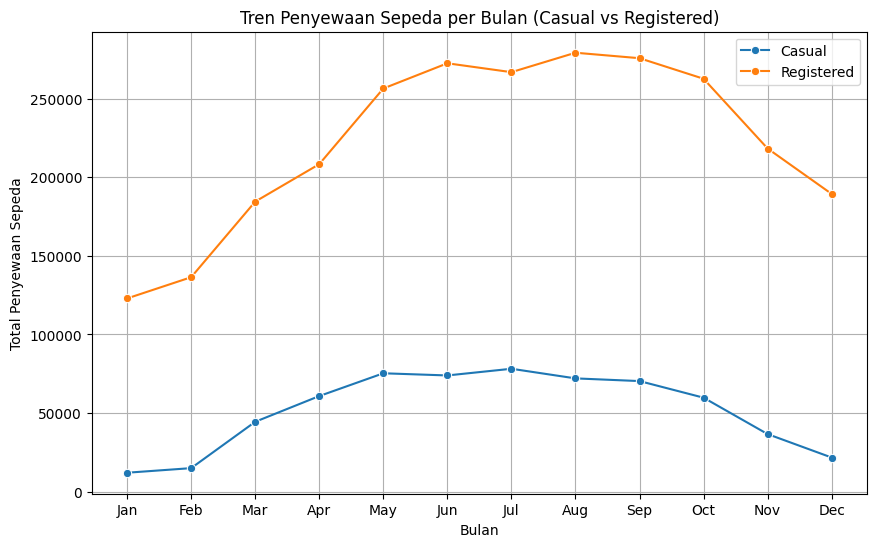

In [35]:
# Tren penyewaan sepeda per bulan untuk pengguna casual dan terdaftar
monthly_user_rentals = day_df.groupby('mnth')[['casual', 'registered']].sum()

# Plot tren penyewaan sepeda per bulan
plt.figure(figsize=(10, 6))
sn.lineplot(x=monthly_user_rentals.index, y=monthly_user_rentals['casual'], label='Casual', marker='o')
sn.lineplot(x=monthly_user_rentals.index, y=monthly_user_rentals['registered'], label='Registered', marker='o')
plt.title('Tren Penyewaan Sepeda per Bulan (Casual vs Registered)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

### Bagaimana perbandingan penyewaan sepeda antara tahun 2011 dan 2012?

In [36]:
# Agregasi total penyewaan sepeda per tahun
yearly_rentals = day_df.groupby('yr').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})
print("Perbandingan Penyewaan Sepeda antara Tahun 2011 dan 2012:\n", yearly_rentals)

Perbandingan Penyewaan Sepeda antara Tahun 2011 dan 2012:
         cnt                        
        sum         mean   max  min
yr                                 
0   1243103  3405.761644  6043  431
1   2049576  5599.934426  8714   22


<ipython-input-37-6858d443b624>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=yearly_rentals.index, y=yearly_rentals.values, palette='viridis')


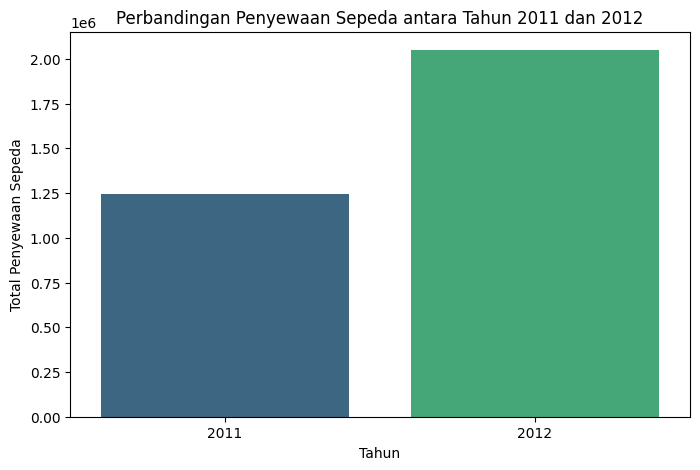

In [37]:
# Agregasi total penyewaan sepeda per tahun
yearly_rentals = day_df.groupby('yr')['cnt'].sum()

# Plot perbandingan penyewaan sepeda antara tahun 2011 dan 2012
plt.figure(figsize=(8, 5))
sn.barplot(x=yearly_rentals.index, y=yearly_rentals.values, palette='viridis')
plt.title('Perbandingan Penyewaan Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'])
plt.show()

## Analisis Lanjutan (Opsional)

### Analisis Korelasi antar Variabel

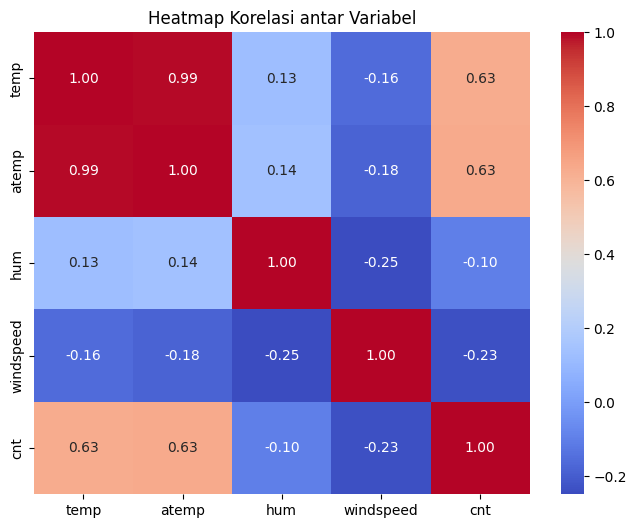

In [38]:
# Hitung matriks korelasi
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Variabel')
plt.show()

**Insight:**
- Variabel Paling Berpengaruh:
  Suhu (temp/atemp) merupakan variabel yang paling berpengaruh terhadap jumlah penyewaan sepeda (cnt), dengan korelasi positif yang cukup kuat (0,63).

- Variabel Kurang Berpengaruh:
  Kelembapan (hum) dan kecepatan angin (windspeed) memiliki korelasi yang sangat lemah dengan jumlah penyewaan sepeda, sehingga pengaruhnya dapat diabaikan.

- Multikolinearitas:
  Suhu (temp) dan suhu yang dirasakan (atemp) memiliki korelasi yang sangat kuat (0,99), sehingga hanya satu dari keduanya yang perlu digunakan dalam analisis atau pemodelan.

## Conclusion

- Bulan Agustus adalah periode dengan penyewaan sepeda tertinggi, sementara bulan Januari adalah periode dengan penyewaan terendah.
- Tepat pada pukul 17.00 di Hari Jumat  adalah waktu dengan penyewaan sepeda tertinggi.
- Musim berpengaruh terhadap penyewaan sepeda karena pengguna lebih sering menyewa saat musim panas yang mana merupakan jumlah penyewaan tertinggi dibanding dengan musim dingin yang cenderung lebih sedikit pengguna menyewa sepeda.
- Cuaca juga berpengaruh terhadap penyewaan sepeda karena pengguna lebih banyak menyewa saat cuaca cerah dibanding cuaca hujan lebat (cuaca ekstrem).
- Sepeda lebih banyak tersewakan oleh pengguna teregistrasi dibandingkan dengan pengguna casual
- Tahun 2012 menjadi tahun dengaan tingkat penyewaan sepeda tertinggi dibandingkan dengan tahun 2011.

In [39]:
hour_df.to_csv("hour_cleaned.csv", index=False)
day_df.to_csv("day_cleaned.csv", index=False)